In [ ]:
import sys
sys.path.insert(0, '../../')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import h5py
import pickle
import bluepyopt
import os
os.chdir("neuron_genetic_alg/neuron_files/bbp/")
from neuron import h
os.chdir("../../../")
import plot_helper as ph

In [2]:
test_stim1_name = 'he_1_1_18'
test_stim2_name = 'chirp_f_0.12_to_0_a_3_to_3'
stims = h5py.File('./stims/stims_full.hdf5', 'r')
neg_stims = h5py.File('./stims/neg_stims.hdf5', 'r')
test_stim1 = stims[test_stim1_name][:]
test_stim2 = stims[test_stim2_name][:]

## Passive

### Score function

/global/cscratch1/sd/zladd/axonstandardized/playground/runs/bbp_passive_01_06_2021/genetic_alg/plot_helper.py:199: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  opt_result = h5py.File(opt_path)


<KeysViewHDF5 ['opt_stim_name_list', 'opt_weight_list', 'ordered_score_function_list']>


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Stims used to train:
chirp_f_0.2_to_0_a_9_to_9
chirp_f_0.2_to_0_a_3_to_9
chirp_f_0.2_to_0_a_3_to_6
chirp_f_0.18_to_0_a_3_to_3
chirp_f_0.16_to_0_a_3_to_6
chirp_f_0.16_to_0_a_9_to_3
chirp_f_0.2_to_0_a_6_to_3
chirp_f_0.12_to_0_a_3_to_6
chirp_f_0.16_to_0_a_6_to_6
chirp_f_0.16_to_0_a_3_to_9
chirp_f_0_to_0.1_a_3_to_9
chirp_f_0.16_to_0_a_9_to_9
chirp_f_0.12_to_0_a_9_to_3
chirp_f_0.14_to_0_a_6_to_6
chirp_f_0_to_0.1_a_3_to_6
chirp_f_0.16_to_0_a_6_to_3
he_3_15_13
he_3_15_5
he_3_19_20
he_1_21_19


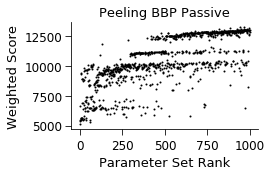

In [3]:
bbp_passive_opt_path = './objectives/multi_stim_without_sensitivity_bbp_passive_01_13_2021_stims.hdf5'
bbp_passive_score_path = '../scores/'
bbp_passive_plot_path = './plots_prev_bounds/scores_bbp_passive'
ph.plot_comb_scores(bbp_passive_opt_path, bbp_passive_score_path, 'Peeling BBP Passive', bbp_passive_plot_path)
print('Stims used to train:')
train_stim_names_passive = h5py.File(bbp_passive_opt_path, 'r')['opt_stim_name_list'][:]
for e in train_stim_names_passive:
    print(e.decode('ascii'))


### Genetic algorithm result

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


[0.378493312165136, 0.9239178104863541, 0.24393301213014704]


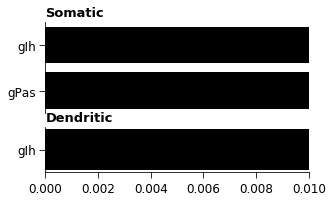

In [4]:
peeling_step = 'passive'
GA_result_path = './neuron_genetic_alg/best_indv_logs/best_indvs_gen_16.pkl'
#GA_result_path = './GPUbest_indvs_gen_13.pkl'

params_path = './neuron_genetic_alg/params/params_bbp_'+peeling_step+'.hdf5'
base_passive = h5py.File(params_path, 'r')['orig_'+peeling_step][0]
peeling_ind_passive_bbp = [3, 20, 23] # bbp Passive
base = [base_passive[i] for i in peeling_ind_passive_bbp]
lbs = [0.01*p for p in base]
ubs = [100*p for p in base]
params_bbp_passive = [ph.params_bbp[i] for i in peeling_ind_passive_bbp]
normalized_indvs_passive_bbp, best_indvs_passive_bbp = ph.read_and_normalize_with_neg(GA_result_path, base, lbs, ubs)
print(normalized_indvs_passive_bbp[-1])
file_path_to_save = './plots_prev_bounds/GA_bbp_passive'
ph.final_indv_plot_by_section(params_bbp_passive, normalized_indvs_passive_bbp[-1], 'For Passive Parameters', file_path_to_save, 0.01, 6,dend_inds= [0],soma_inds=[1,2],axon_inds=None,xlim=[0,0.01])
for i in range(len(base)):
    ph.normalized_indvs_bbp_overall[peeling_ind_passive_bbp[i]] = normalized_indvs_passive_bbp[-1][i]
    ph.best_indvs_bbp_overall[peeling_ind_passive_bbp[i]] = best_indvs_passive_bbp[-1][i]
    

In [5]:
peeling_step = 'passive'
GA_result_path = './neuron_genetic_alg/best_indv_logs/best_indvs_gen_16.pkl'
#GA_result_path = './GPUbest_indvs_gen_13.pkl'

params_path = './neuron_genetic_alg/params/params_bbp_'+peeling_step+'.hdf5'
base_passive = h5py.File(params_path, 'r')['orig_'+peeling_step][0]
peeling_ind_passive_bbp = [3, 20, 23] # bbp Passive
base = [base_passive[i] for i in peeling_ind_passive_bbp]
lbs = [0.01*p for p in base]
ubs = [100*p for p in base]
params_bbp_passive = [ph.params_bbp[i] for i in peeling_ind_passive_bbp]
normalized_indvs_passive_bbp, best_indvs_passive_bbp = ph.read_and_normalize_with_neg(GA_result_path, base, lbs, ubs)
print(normalized_indvs_passive_bbp[-1])
file_path_to_save = './plots_prev_bounds/GA_bbp_passive'
ph.final_indv_plot_by_section(params_bbp_passive, normalized_indvs_passive_bbp[-1], 'For Passive Parameters', file_path_to_save, 0.01, 6,dend_inds= [0],soma_inds=[1,2],axon_inds=None,xlim=[0,0.01])
for i in range(len(base)):
    ph.normalized_indvs_bbp_overall[peeling_ind_passive_bbp[i]] = normalized_indvs_passive_bbp[-1][i]
    ph.best_indvs_bbp_overall[peeling_ind_passive_bbp[i]] = best_indvs_passive_bbp[-1][i]
    

OSError: Unable to open file (unable to open file: name = './params/params_bbp_passive.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


[0.378493312165136, 0.9239178104863541, 0.24393301213014704]


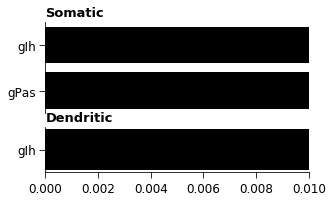

In [3]:
peeling_step = 'passive'
GA_result_path = './neuron_genetic_alg/best_indv_logs/best_indvs_gen_2.pkl'
params_path = './neuron_genetic_alg/params/params_bbp_'+peeling_step+'.hdf5'
base_passive = h5py.File(params_path, 'r')['orig_'+peeling_step][0]
peeling_ind_passive_bbp = [3, 20, 23] # bbp Passive
base = [base_passive[i] for i in peeling_ind_passive_bbp]
lbs = [0.01*p for p in base]
ubs = [100*p for p in base]
params_bbp_passive = [ph.params_bbp[i] for i in peeling_ind_passive_bbp]
normalized_indvs_passive_bbp, best_indvs_passive_bbp = ph.read_and_normalize_with_neg(GA_result_path, base, lbs, ubs)
print(normalized_indvs_passive_bbp[-1])
file_path_to_save = './plots_prev_bounds/GA_bbp_passive'
ph.final_indv_plot_by_section(params_bbp_passive, normalized_indvs_passive_bbp[-1], 'For Passive Parameters', file_path_to_save, 0.01, 6,dend_inds= [0],soma_inds=[1,2],axon_inds=None,xlim=[0,0.01])
for i in range(len(base)):
    ph.normalized_indvs_bbp_overall[peeling_ind_passive_bbp[i]] = normalized_indvs_passive_bbp[-1][i]
    ph.best_indvs_bbp_overall[peeling_ind_passive_bbp[i]] = best_indvs_passive_bbp[-1][i]
    

### Train stim response

In [8]:
best_passive = list(base_passive)
for i in range(len(peeling_ind_passive_bbp)):
    best_passive[peeling_ind_passive_bbp[i]] = best_indvs_passive_bbp[-1][i]

In [15]:
train_stim1_name_passive = train_stim_names_passive[0]
print(neg_stims.keys())
train_stim1_passive = neg_stims[train_stim1_name_passive][:]
train_volts_passive_target,times = ph.run_single_volts(base_passive, train_stim1_passive)
train_volts_passive_best_response,times = ph.run_single_volts(best_passive, train_stim1_passive)
file_save_path = './plots_prev_bounds/train_bbp_passive'
volts = [train_volts_passive_target, train_volts_passive_best_response]
print(volts[0])
print(volts[1])
ph.plot_stim_volts_pair(train_stim1_passive, volts, train_stim1_name_passive.decode('ascii')+' (Training)', 'for Passive Parameters', file_save_path)


<KeysViewHDF5 ['chirp_f_0.05_to_0_a_0.05_to_0.05_m_-0.1', 'chirp_f_0.05_to_0_a_0.05_to_0.1_m_-0.1', 'chirp_f_0.05_to_0_a_0.05_to_0.2_m_-0.1', 'chirp_f_0.05_to_0_a_0.1_to_0.05_m_-0.1', 'chirp_f_0.05_to_0_a_0.1_to_0.1_m_-0.1', 'chirp_f_0.05_to_0_a_0.2_to_0.05_m_-0.1', 'chirp_f_0.05_to_0_a_0.2_to_0.2_m_-0.1', 'chirp_f_0.05_to_0_a_0.2_to_0.2_m_-0.3', 'chirp_f_0.05_to_0_a_0.2_to_0.3_m_-0.3', 'chirp_f_0.05_to_0_a_0.2_to_0.4_m_-0.3', 'chirp_f_0.05_to_0_a_0.3_to_0.2_m_-0.3', 'chirp_f_0.05_to_0_a_0.3_to_0.3_m_-0.3', 'chirp_f_0.05_to_0_a_0.4_to_0.2_m_-0.3', 'chirp_f_0.05_to_0_a_0.4_to_0.4_m_-0.3', 'chirp_f_0.1_to_0_a_0.05_to_0.05_m_-0.1', 'chirp_f_0.1_to_0_a_0.05_to_0.1_m_-0.1', 'chirp_f_0.1_to_0_a_0.05_to_0.2_m_-0.1', 'chirp_f_0.1_to_0_a_0.1_to_0.05_m_-0.1', 'chirp_f_0.1_to_0_a_0.1_to_0.1_m_-0.1', 'chirp_f_0.1_to_0_a_0.2_to_0.05_m_-0.1', 'chirp_f_0.1_to_0_a_0.2_to_0.2_m_-0.1', 'chirp_f_0.1_to_0_a_0.2_to_0.2_m_-0.3', 'chirp_f_0.1_to_0_a_0.2_to_0.3_m_-0.3', 'chirp_f_0.1_to_0_a_0.2_to_0.4_m_-0.3',

KeyError: "Unable to open object (object 'chirp_f_0.2_to_0_a_9_to_9' doesn't exist)"

In [6]:
best_passive = list(base_passive)
for i in range(len(peeling_ind_passive_bbp)):
    best_passive[peeling_ind_passive_bbp[i]] = best_indvs_passive_bbp[-1][i]
train_stim1_name_passive = train_stim_names_passive[0]
train_stim1_passive = neg_stims[train_stim1_name_passive][:]
train_volts_passive_target,times = ph.run_single_volts(base_passive, train_stim1_passive)
train_volts_passive_best_response,times = ph.run_single_volts(best_passive, train_stim1_passive)
file_save_path = './plots_prev_bounds/train_bbp_passive'
volts = [train_volts_passive_target, train_volts_passive_best_response]
print(volts[0])
print(volts[1])
ph.plot_stim_volts_pair(train_stim1_passive, volts, train_stim1_name_passive.decode('ascii')+' (Training)', 'for Passive Parameters', file_save_path)


NameError: name 'train_stim_names_passive' is not defined

### Test stim response

In [ ]:
test_volts_passive_target1,times = ph.run_single_volts(base_passive, test_stim1)
test_volts_passive_best_response1,times = ph.run_single_volts(best_passive, test_stim1)
file_save_path = './plots_prev_bounds/test_bbp_passive_stim1'
ph.plot_stim_volts_pair(test_stim1, [test_volts_passive_target1, test_volts_passive_best_response1], test_stim1_name+' (Testing)', 'for Passive Parameters', file_save_path)

test_volts_passive_target2,times = ph.run_single_volts(base_passive, test_stim2)
test_volts_passive_best_response2,times = ph.run_single_volts(best_passive, test_stim2)
file_save_path = './plots_prev_bounds/test_bbp_passive_stim2'
ph.plot_stim_volts_pair(test_stim2, [test_volts_passive_target2, test_volts_passive_best_response2], test_stim2_name+' (Testing)', 'for Passive Parameters', file_save_path)


## Potassium 

### Score function

../..\plot_helper.py:198: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  opt_result = h5py.File(opt_path)


<KeysViewHDF5 ['opt_stim_name_list', 'opt_weight_list', 'ordered_score_function_list']>
Stims used to train:
step_-0.25
step_-0.3
chirp_f_0_to_0.05_a_0.2_to_0.4_m_-0.3
chirp_f_0_to_0.05_a_0.2_to_0.3_m_-0.3
chirp_f_0_to_0.05_a_0.2_to_0.2_m_-0.3
chirp_f_0_to_0.1_a_0.2_to_0.2_m_-0.3
chirp_f_0_to_0.1_a_0.2_to_0.3_m_-0.3
chirp_f_0_to_0.1_a_0.2_to_0.4_m_-0.3
negramp_-0.4
chirp_f_0_to_0.3_a_0.2_to_0.2_m_-0.3
chirp_f_0_to_0.2_a_0.2_to_0.3_m_-0.3
chirp_f_0_to_0.2_a_0.2_to_0.2_m_-0.3
negramp_-0.35
chirp_f_0_to_0.3_a_0.2_to_0.3_m_-0.3
negramp_-0.45
chirp_f_0_to_0.2_a_0.2_to_0.4_m_-0.3
step_-0.35
chirp_f_0_to_0.3_a_0.2_to_0.4_m_-0.3
ramp_-0.5
ramp_-0.45


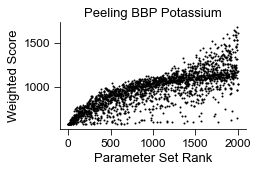

In [44]:
bbp_potassium_opt_path = './objectives/multi_stim_without_sensitivity_bbp_potassium_01_26_2021_stims.hdf5'
bbp_potassium_score_path = '../scores/'
bbp_potassium_plot_path = './plots_prev_bounds/scores_bbp_potassium'
ph.plot_comb_scores(bbp_potassium_opt_path, bbp_potassium_score_path, 'Peeling BBP Potassium', bbp_potassium_plot_path)
print('Stims used to train:')
train_stim_names_potassium = h5py.File(bbp_potassium_opt_path, 'r')['opt_stim_name_list'][:]
for e in train_stim_names_potassium:
    print(e.decode('ascii'))


### Genetic algorithm result

In [45]:
peeling_step = 'potassium'
GA_result_path = './GA_results/prev_params_20_percent_bound/best_indv_bbp_'+peeling_step+'.pkl'
params_path = './params/params_bbp_'+peeling_step+'.hdf5'
base_potassium = h5py.File(params_path, 'r')['orig_'+peeling_step][0]
peeling_ind_potassium_bbp = [2, 3, 4, 6, 11, 12, 16, 20, 23] # bbp Potassium and Passive
base = [base_potassium[i] for i in peeling_ind_potassium_bbp]
lbs = [0.01*p for p in base]
ubs = [100*p for p in base]
params_bbp_potassium = [ph.params_bbp[i] for i in peeling_ind_potassium_bbp]
normalized_indvs_potassium_bbp, best_indvs_potassium_bbp = ph.read_and_normalize_with_neg(GA_result_path, base, lbs, ubs)
file_path_to_save = './plots_prev_bounds/GA_bbp_potassium'
print(params_bbp_potassium)


['gSKv3_1bar_SKv3_1_apical', 'gIhbar_Ih_apical', 'gImbar_Im_apical', 'gK_Tstbar_K_Tst_axonal', 'gK_Pstbar_K_Pst_axonal', 'gSKv3_1bar_SKv3_1_axonal', 'gSKv3_1bar_SKv3_1_somatic', 'gIhbar_Ih_somatic', 'g_pas']


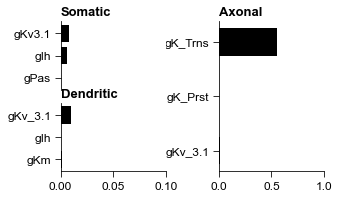

In [46]:
ph.final_indv_plot_by_section(params_bbp_potassium, normalized_indvs_potassium_bbp[-1], 'For Potassium Parameters', file_path_to_save,dend_inds=[0,1,2],axon_inds=[3,4,5],soma_inds=[6,7,8] ,xlim=[0,0.1])
for i in range(len(base)):
    ph.normalized_indvs_bbp_overall[peeling_ind_potassium_bbp[i]] = normalized_indvs_potassium_bbp[-1][i]
    ph.best_indvs_bbp_overall[peeling_ind_potassium_bbp[i]] = best_indvs_potassium_bbp[-1][i]
    

### Train stim response

In [47]:
best_potassium = list(base_potassium)
for i in range(len(peeling_ind_potassium_bbp)):
    best_potassium[peeling_ind_potassium_bbp[i]] = best_indvs_potassium_bbp[-1][i]

8e-005	0	0.004226	8e-005	0.000143	
0	0.089259	0.00291	0	0	
0	0.973538	1.02195	287.199	0	
0.000609	0.303472	0	0	0	
8e-005	210.485	0	3e-005	
finshed run matrix
8e-005	0	0.00855308	8.33698e-005	0.000123298	
0	4.96856	0.00291	0	0	
0	0.820759	1.90376	287.199	0	
0.000609	0.0632149	0	0	0	
3.27272e-005	210.485	0	2.99621e-005	
finshed run matrix


(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'step_-0.25 (Training)'}>,
        <AxesSubplot:>], dtype=object))

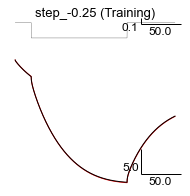

In [48]:
train_stim1_name_potassium = train_stim_names_potassium[0]
train_stim1_potassium = neg_stims[train_stim1_name_potassium][:]
train_volts_potassium_target,time = ph.run_single_volts(base_potassium, train_stim1_potassium)
train_volts_potassium_best_response,time = ph.run_single_volts(best_potassium, train_stim1_potassium)
file_save_path = './plots_prev_bounds/train_bbp_potassium'
ph.plot_stim_volts_pair(train_stim1_potassium, [train_volts_potassium_target, train_volts_potassium_best_response], train_stim1_name_potassium.decode('ascii')+' (Training)', 'for Potassium Parameters', file_save_path)


### Test stim response

8e-005	0	0.004226	8e-005	0.000143	
0	0.089259	0.00291	0	0	
0	0.973538	1.02195	287.199	0	
0.000609	0.303472	0	0	0	
8e-005	210.485	0	3e-005	
finshed run matrix
8e-005	0	0.00855308	8.33698e-005	0.000123298	
0	4.96856	0.00291	0	0	
0	0.820759	1.90376	287.199	0	
0.000609	0.0632149	0	0	0	
3.27272e-005	210.485	0	2.99621e-005	
finshed run matrix
8e-005	0	0.004226	8e-005	0.000143	
0	0.089259	0.00291	0	0	
0	0.973538	1.02195	287.199	0	
0.000609	0.303472	0	0	0	
8e-005	210.485	0	3e-005	
finshed run matrix
8e-005	0	0.00855308	8.33698e-005	0.000123298	
0	4.96856	0.00291	0	0	
0	0.820759	1.90376	287.199	0	
0.000609	0.0632149	0	0	0	
3.27272e-005	210.485	0	2.99621e-005	
finshed run matrix


(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'chirp_f_0.12_to_0_a_3_to_3 (Testing)'}>,
        <AxesSubplot:>], dtype=object))

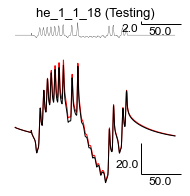

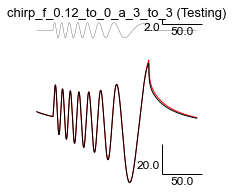

In [49]:
test_volts_potassium_target1,times = ph.run_single_volts(base_potassium, test_stim1)
test_volts_potassium_best_response1,times = ph.run_single_volts(best_potassium, test_stim1)
file_save_path = './plots_prev_bounds/test_bbp_potassium_stim1'
ph.plot_stim_volts_pair(test_stim1, [test_volts_potassium_target1, test_volts_potassium_best_response1], test_stim1_name+' (Testing)', 'for Potassium Parameters', file_save_path)

test_volts_potassium_target2,times = ph.run_single_volts(base_potassium, test_stim2)
test_volts_potassium_best_response2,times = ph.run_single_volts(best_potassium, test_stim2)
file_save_path = './plots_prev_bounds/test_bbp_potassium_stim2'
ph.plot_stim_volts_pair(test_stim2, [test_volts_potassium_target2, test_volts_potassium_best_response2], test_stim2_name+' (Testing)', 'for Potassium Parameters', file_save_path)


## Sodium

### Score function

../..\plot_helper.py:198: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  opt_result = h5py.File(opt_path)


<KeysViewHDF5 ['opt_stim_name_list', 'opt_weight_list', 'ordered_score_function_list']>
Stims used to train:
chirp_f_0.1_to_0_a_6_to_6
chirp_f_0.26_to_0_a_9_to_3
chirp_f_0.28_to_0_a_9_to_3
chirp_f_0.26_to_0_a_9_to_9
chirp_f_0.2_to_0_a_6_to_6
chirp_f_0.1_to_0_a_3_to_9
sin_f_0.8_a_9_m_0
chirp_f_0.26_to_0_a_6_to_6
chirp_f_0.24_to_0_a_9_to_3
chirp_f_0.28_to_0_a_3_to_9
chirp_f_0.18_to_0_a_3_to_9
chirp_f_0.1_to_0_a_3_to_6
chirp_f_0.28_to_0_a_9_to_9
chirp_f_0.1_to_0_a_6_to_3
chirp_f_0_to_0.12_a_3_to_6
chirp_f_0.18_to_0_a_6_to_3
chirp_f_0.28_to_0_a_6_to_6
chirp_f_0.12_to_0_a_6_to_3
chirp_f_0.22_to_0_a_6_to_3
chirp_f_0.2_to_0_a_6_to_3


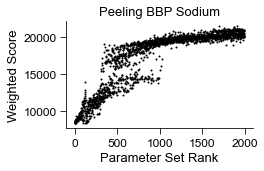

In [50]:
bbp_sodium_opt_path = './objectives/multi_stim_without_sensitivity_bbp_sodium_1_0_20_stims.hdf5'
bbp_sodium_score_path = './scores/scores_bbp_sodium/'
bbp_sodium_plot_path = './plots_prev_bounds/scores_bbp_sodium'
ph.plot_comb_scores(bbp_sodium_opt_path, bbp_sodium_score_path, 'Peeling BBP Sodium', bbp_sodium_plot_path)
print('Stims used to train:')
train_stim_names_sodium = h5py.File(bbp_sodium_opt_path, 'r')['opt_stim_name_list'][:]
for e in train_stim_names_sodium:
    print(e.decode('ascii'))


### Genetic algorithm result

In [51]:
peeling_step = 'sodium'
GA_result_path = './GA_results/prev_params_20_percent_bound/best_indv_bbp_'+peeling_step+'.pkl'
params_path = './params/params_bbp_'+peeling_step+'.hdf5'
base_sodium = h5py.File(params_path, 'r')['orig_'+peeling_step][0]
peeling_ind_sodium_bbp = [1, 2, 3, 4, 5, 6, 8, 11, 12, 16, 19, 20, 23] # bbp Sodium, Potassium and Passive
base = [base_sodium[i] for i in peeling_ind_sodium_bbp]
lbs = [0.01*p for p in base]
ubs = [100*p for p in base]
params_bbp_sodium = [ph.params_bbp[i] for i in peeling_ind_sodium_bbp]
print(params_bbp_sodium)

['gNaTs2_tbar_NaTs2_t_apical', 'gSKv3_1bar_SKv3_1_apical', 'gIhbar_Ih_apical', 'gImbar_Im_apical', 'gNaTa_tbar_NaTa_t_axonal', 'gK_Tstbar_K_Tst_axonal', 'gNap_Et2bar_Nap_Et2_axonal', 'gK_Pstbar_K_Pst_axonal', 'gSKv3_1bar_SKv3_1_axonal', 'gSKv3_1bar_SKv3_1_somatic', 'gNaTs2_tbar_NaTs2_t_somatic', 'gIhbar_Ih_somatic', 'g_pas']


[<AxesSubplot:title={'left':'Somatic'}>, <AxesSubplot:title={'left':'Dendritic'}>, <AxesSubplot:title={'left':'Axonal'}>]


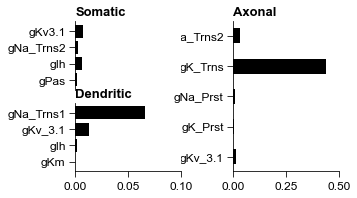

In [10]:
normalized_indvs_sodium_bbp, best_indvs_sodium_bbp = ph.read_and_normalize_with_neg(GA_result_path, base, lbs, ubs)
file_path_to_save = './plots_prev_bounds/GA_bbp_sodium'
axs = ph.final_indv_plot_by_section(params_bbp_sodium, normalized_indvs_sodium_bbp[-1], 'For Sodium Parameters', file_path_to_save, 0.5, 12,dend_inds = [0,1,2,3],axon_inds = [4,5,6,7,8], soma_inds = [9,10,11,12],xlim=[0,0.1])
for i in range(len(base)):
    ph.normalized_indvs_bbp_overall[peeling_ind_sodium_bbp[i]] = normalized_indvs_sodium_bbp[-1][i]
    ph.best_indvs_bbp_overall[peeling_ind_sodium_bbp[i]] = best_indvs_sodium_bbp[-1][i]
print(axs)    
axs[2].set_xlim([0,0.5])
plt.show()

### Train stim response

In [16]:
best_sodium = list(base_sodium)
for i in range(len(peeling_ind_sodium_bbp)):
    best_sodium[peeling_ind_sodium_bbp[i]] = best_indvs_sodium_bbp[-1][i]

8e-005	0.026145	0.004226	8e-005	0.000143	
3.13797	0.089259	0.00291	0.006827	0	
0	0.973538	1.02195	287.199	0	
0.000609	0.303472	0	0	0.983955	
8e-005	210.485	0	3e-005	
finshed run matrix
8e-005	0.197105	0.00988555	9.23919e-005	0.000144963	
13.3034	3.97882	0.00291	0.000101272	0	
0	0.691625	2.27328	287.199	0	
0.000609	0.0755799	0	0	0.728668	
3.05303e-005	210.485	0	2.49293e-005	
finshed run matrix


(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'chirp_f_0.1_to_0_a_6_to_6 (Training)'}>,
        <AxesSubplot:>], dtype=object))

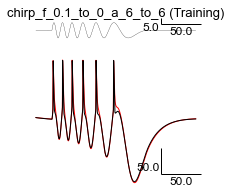

In [13]:
train_stim1_name_sodium = train_stim_names_sodium[0]
train_stim1_sodium = stims[train_stim1_name_sodium][:]
train_volts_sodium_target,times = ph.run_single_volts(base_sodium, train_stim1_sodium)
train_volts_sodium_best_response,times = ph.run_single_volts(best_sodium, train_stim1_sodium)
file_save_path = './plots_prev_bounds/train_bbp_sodium'
ph.plot_stim_volts_pair(train_stim1_sodium, [train_volts_sodium_target, train_volts_sodium_best_response], train_stim1_name_sodium.decode('ascii')+' (Training)', 'for Sodium Parameters', file_save_path)


### Test stim response

8e-005	0.026145	0.004226	8e-005	0.000143	
3.13797	0.089259	0.00291	0.006827	0	
0	0.973538	1.02195	287.199	0	
0.000609	0.303472	0	0	0.983955	
8e-005	210.485	0	3e-005	
finshed run matrix
8e-005	0.197105	0.00988555	9.23919e-005	0.000144963	
13.3034	3.97882	0.00291	0.000101272	0	
0	0.691625	2.27328	287.199	0	
0.000609	0.0755799	0	0	0.728668	
3.05303e-005	210.485	0	2.49293e-005	
finshed run matrix
8e-005	0.026145	0.004226	8e-005	0.000143	
3.13797	0.089259	0.00291	0.006827	0	
0	0.973538	1.02195	287.199	0	
0.000609	0.303472	0	0	0.983955	
8e-005	210.485	0	3e-005	
finshed run matrix
8e-005	0.197105	0.00988555	9.23919e-005	0.000144963	
13.3034	3.97882	0.00291	0.000101272	0	
0	0.691625	2.27328	287.199	0	
0.000609	0.0755799	0	0	0.728668	
3.05303e-005	210.485	0	2.49293e-005	
finshed run matrix


(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'chirp_f_0.12_to_0_a_3_to_3 (Testing)'}>,
        <AxesSubplot:>], dtype=object))

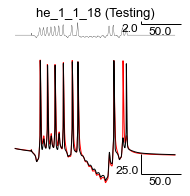

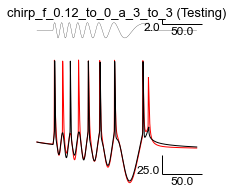

In [37]:
test_volts_sodium_target1,times = ph.run_single_volts(base_sodium, test_stim1)
test_volts_sodium_best_response1,times = ph.run_single_volts(best_sodium, test_stim1)
file_save_path = './plots_prev_bounds/test_bbp_sodium_stim1'
ph.plot_stim_volts_pair(test_stim1, [test_volts_sodium_target1, test_volts_sodium_best_response1], test_stim1_name+' (Testing)', 'for Sodium Parameters', file_save_path)

test_volts_sodium_target2,times = ph.run_single_volts(base_sodium, test_stim2)
test_volts_sodium_best_response2,times = ph.run_single_volts(best_sodium, test_stim2)
file_save_path = './plots_prev_bounds/test_bbp_sodium_stim2'
ph.plot_stim_volts_pair(test_stim2, [test_volts_sodium_target2, test_volts_sodium_best_response2], test_stim2_name+' (Testing)', 'for Sodium Parameters', file_save_path)


## Calcium

### Score function

<KeysViewHDF5 ['opt_stim_name_list', 'opt_weight_list', 'ordered_score_function_list']>
Stims used to train:
chirp_f_0.1_to_0_a_3_to_9
negramp_0.49
negramp_0.51
negramp_0.52
negramp_0.43
ramp_0.54
chirp_f_0.24_to_0_a_3_to_3
ramp_0.52
sin_f_0.6_a_3_m_0
he_1_6_12
ramp_0.49
ramp_0.55
chirp_f_0_to_0.18_a_3_to_3
he_3_19_15
chirp_f_0_to_0.12_a_3_to_6
chirp_f_0.14_to_0_a_3_to_9
chirp_f_0.24_to_0_a_3_to_6
negramp_0.41
chirp_f_0_to_0.18_a_3_to_6
chirp_f_0.24_to_0_a_3_to_9


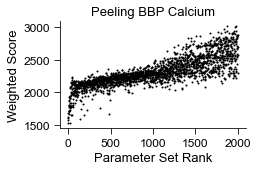

In [17]:
bbp_calcium_opt_path = './objectives/multi_stim_without_sensitivity_bbp_calcium_1_0_20_stims.hdf5'
bbp_calcium_score_path = './scores/scores_bbp_calcium/'
bbp_calcium_plot_path = './plots_prev_bounds/scores_bbp_calcium'
ph.plot_comb_scores(bbp_calcium_opt_path, bbp_calcium_score_path, 'Peeling BBP Calcium', bbp_calcium_plot_path)
print('Stims used to train:')
train_stim_names_calcium = h5py.File(bbp_calcium_opt_path, 'r')['opt_stim_name_list'][:]
for e in train_stim_names_calcium:
    print(e.decode('ascii'))


### Genetic algorithm result

In [20]:
peeling_step = 'calcium'
GA_result_path = './GA_results/prev_params_20_percent_bound/best_indv_bbp_'+peeling_step+'_bad.pkl'
params_path = './params/params_bbp_'+peeling_step+'.hdf5'
base_calcium = h5py.File(params_path, 'r')['orig_'+peeling_step][0]
peeling_ind_calcium_bbp = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 22, 23] # bbp Calcium 
#[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 22, 23] # bbp Calcium 
# [9, 10, 14, 17, 18, 22]
# [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 22, 23] # bbp Calcium 
# [9, 10, 14, 17, 18, 22]
base = [base_calcium[i] for i in peeling_ind_calcium_bbp]
lbs = [0.01*p for p in base]
ubs = [100*p for p in base]
params_bbp_calcium = [ph.params_bbp[i] for i in peeling_ind_calcium_bbp]
normalized_indvs_calcium_bbp, best_indvs_calcium_bbp = ph.read_and_normalize_with_neg(GA_result_path, base, lbs, ubs)
file_path_to_save = './plots_prev_bounds/GA_bbp_calcium'
print(params_bbp_calcium)


['gNaTs2_tbar_NaTs2_t_apical', 'gSKv3_1bar_SKv3_1_apical', 'gIhbar_Ih_apical', 'gImbar_Im_apical', 'gNaTa_tbar_NaTa_t_axonal', 'gK_Tstbar_K_Tst_axonal', 'gNap_Et2bar_Nap_Et2_axonal', 'gSK_E2bar_SK_E2_axonal', 'gCa_HVAbar_Ca_HVA_axonal', 'gK_Pstbar_K_Pst_axonal', 'gSKv3_1bar_SKv3_1_axonal', 'gCa_LVAstbar_Ca_LVAst_axonal', 'gSKv3_1bar_SKv3_1_somatic', 'gSK_E2bar_SK_E2_somatic', 'gCa_HVAbar_Ca_HVA_somatic', 'gNaTs2_tbar_NaTs2_t_somatic', 'gIhbar_Ih_somatic', 'gCa_LVAstbar_Ca_LVAst_somatic', 'g_pas']


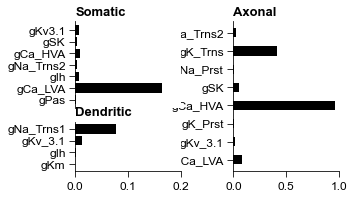

In [32]:
ph.final_indv_plot_by_section(params_bbp_calcium, normalized_indvs_calcium_bbp[-1], 'For Calcium Parameters', file_path_to_save, 1, 18,dend_inds = [0,1,2,3],axon_inds = [4,5,6,7,8,9,10,11], soma_inds = [12,13,14,15,16,17,18],xlim=[0,0.2])
for i in range(len(base)):
    ph.normalized_indvs_bbp_overall[peeling_ind_calcium_bbp[i]] = normalized_indvs_calcium_bbp[-1][i]
    ph.best_indvs_bbp_overall[peeling_ind_calcium_bbp[i]] = best_indvs_calcium_bbp[-1][i]
  

### Train stim response

In [33]:
# [9, 10, 14, 17, 18, 22]
best_calcium = list(best_sodium)
#best_calcium = list(best_sodium)
for i in range(len(peeling_ind_calcium_bbp)):
    best_calcium[peeling_ind_calcium_bbp[i]] = best_indvs_calcium_bbp[-1][i]
print(best_calcium[9])
#best_calcium[9] = 7.10400000e-03# base_calcium[9]

0.043354324280927094


8e-005	0.026145	0.004226	8e-005	0.000143	
3.13797	0.089259	0.00291	0.006827	0.007104	
0.00099	0.973538	1.02195	287.199	0.008752	
0.000609	0.303472	0.008407	0.000994	0.983955	
8e-005	210.485	0.000333	3e-005	
finshed run matrix
8e-005	0.22763	0.00999366	7.50317e-005	0.00013759	
10.9262	3.78388	0.00291	0.000105188	0.0433543	
0.0952781	0.709025	2.43741	287.199	0.076348	
0.000609	0.0828394	0.00536646	0.000190935	0.587413	
2.4579e-005	210.485	0.00574226	2.79981e-005	
finshed run matrix


(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'chirp_f_0.1_to_0_a_3_to_9 (Training)'}>,
        <AxesSubplot:>], dtype=object))

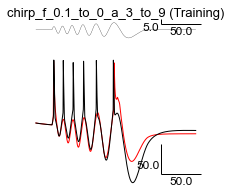

In [34]:
train_stim1_name_calcium = train_stim_names_calcium[0]
train_stim1_calcium = stims[train_stim1_name_calcium][:]
train_volts_calcium_target,times = ph.run_single_volts(base_calcium, train_stim1_calcium)
train_volts_calcium_best_response,times = ph.run_single_volts(best_calcium, train_stim1_calcium)
file_save_path = './plots_prev_bounds/train_bbp_calcium'
ph.plot_stim_volts_pair(train_stim1_calcium, [train_volts_calcium_target, train_volts_calcium_best_response], train_stim1_name_calcium.decode('ascii')+' (Training)', 'for Calcium Parameters', file_save_path)


8e-005	0.026145	0.004226	8e-005	0.000143	
3.13797	0.089259	0.00291	0.006827	0.007104	
0.00099	0.973538	1.02195	287.199	0.008752	
0.000609	0.303472	0.008407	0.000994	0.983955	
8e-005	210.485	0.000333	3e-005	
finshed run matrix
8e-005	0.22763	0.00999366	7.50317e-005	0.00013759	
10.9262	3.78388	0.00291	0.000105188	0.0433543	
0.0952781	0.709025	2.43741	287.199	0.076348	
0.000609	0.0828394	0.00536646	0.000190935	0.587413	
2.4579e-005	210.485	0.00574226	2.79981e-005	
finshed run matrix
8e-005	0.026145	0.004226	8e-005	0.000143	
3.13797	0.089259	0.00291	0.006827	0.007104	
0.00099	0.973538	1.02195	287.199	0.008752	
0.000609	0.303472	0.008407	0.000994	0.983955	
8e-005	210.485	0.000333	3e-005	
finshed run matrix
8e-005	0.22763	0.00999366	7.50317e-005	0.00013759	
10.9262	3.78388	0.00291	0.000105188	0.0433543	
0.0952781	0.709025	2.43741	287.199	0.076348	
0.000609	0.0828394	0.00536646	0.000190935	0.587413	
2.4579e-005	210.485	0.00574226	2.79981e-005	
finshed run matrix


(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'chirp_f_0.12_to_0_a_3_to_3 (Testing)'}>,
        <AxesSubplot:>], dtype=object))

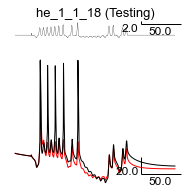

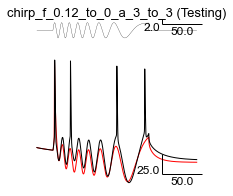

In [36]:
test_volts_calcium_target1,times = ph.run_single_volts(base_calcium, test_stim1)
test_volts_calcium_best_response1,times = ph.run_single_volts(best_calcium, test_stim1)
file_save_path = './plots_prev_bounds/test_bbp_calcium_stim1'
ph.plot_stim_volts_pair(test_stim1, [test_volts_calcium_target1, test_volts_calcium_best_response1], test_stim1_name+' (Testing)', 'for Calcium Parameters', file_save_path)

test_volts_calcium_target2,times = ph.run_single_volts(base_calcium, test_stim2)
test_volts_calcium_best_response2,times = ph.run_single_volts(best_calcium, test_stim2)
file_save_path = './plots_prev_bounds/test_bbp_calcium_stim2'
ph.plot_stim_volts_pair(test_stim2, [test_volts_calcium_target2, test_volts_calcium_best_response2], test_stim2_name+' (Testing)', 'for Calcium Parameters', file_save_path)


In [ ]:
peeling_step = 'full'
GA_result_path = './GA_results/prev_params_20_percent_bound/best_indv_bbp_'+peeling_step+'_tune.pkl'
params_path = './params/params_bbp_'+peeling_step+'.hdf5'
base_full = h5py.File(params_path, 'r')['orig_'+peeling_step][0]
peeling_ind_full_bbp = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 22, 23] # bbp Full
base = [base_full[i] for i in peeling_ind_full_bbp]
lbs = [0.01*p for p in base]
ubs = [100*p for p in base]
params_bbp_full = [params_bbp[i] for i in peeling_ind_full_bbp]
normalized_indvs_full_bbp, best_indvs_full_bbp = read_and_normalize_with_neg(GA_result_path, base, lbs, ubs)
file_path_to_save = './plots_prev_bounds/GA_bbp_full'
final_indv_plot(params_bbp_full, normalized_indvs_full_bbp[-1], 'For Full Parameters', file_path_to_save, 1, 18)
for i in range(len(base)):
    normalized_indvs_bbp_overall[peeling_ind_full_bbp[i]] = normalized_indvs_full_bbp[-1][i]
    best_indvs_bbp_overall[peeling_ind_full_bbp[i]] = best_indvs_full_bbp[-1][i]
    

In [ ]:
print(base_full)

In [ ]:
best_full = list(base_full)
for i in range(len(peeling_ind_full_bbp)):
    best_full[peeling_ind_full_bbp[i]] = best_indvs_full_bbp[-1][i]
print(np.array(best_full))

In [ ]:
train_stim1_name_full = train_stim_names_full[0]
train_stim1_full = stims[train_stim1_name_full][:]
train_volts_full_target = run_single_volts(base_full, train_stim1_full)
train_volts_full_best_response = run_single_volts(best_full, train_stim1_full)
file_save_path = './plots_prev_bounds/train_bbp_full'
plot_stim_volts_pair(train_stim1_full, [train_volts_full_target, train_volts_full_best_response], train_stim1_name_full.decode('ascii')+' (Training)', 'for Full Parameters', file_save_path)



In [ ]:
test_volts_full_target1 = run_single_volts(base_full, test_stim1)
test_volts_full_best_response1 = run_single_volts(best_full, test_stim1)
file_save_path = './plots_prev_bounds/test_bbp_full_stim1'
plot_stim_volts_pair(test_stim1, [test_volts_full_target1, test_volts_full_best_response1], test_stim1_name+' (Testing)', 'for Full Parameters', file_save_path)

test_volts_full_target2 = run_single_volts(base_full, test_stim2)
test_volts_full_best_response2 = run_single_volts(best_full, test_stim2)
file_save_path = './plots_prev_bounds/test_bbp_full_stim2'
plot_stim_volts_pair(test_stim2, [test_volts_full_target2, test_volts_full_best_response2], test_stim2_name+' (Testing)', 'for Full Parameters', file_save_path)




In [ ]:
base_calcium = np.array(base_calcium)
best_calcium = np.array(best_calcium)
diff = np.abs(base_calcium - best_calcium)
print(diff/base_calcium)

In [ ]:
print(base_calcium)

In [ ]:
print(best_calcium)

In [ ]:
for i in range(24):
    if i in peeling_ind_calcium_bbp:
        print(str('{0:.10f}'.format(best_calcium[i]))+','+str('{0:.10f}'.format(best_calcium[i]*0.1))+','+str('{0:.10f}'.format(best_calcium[i]*10)))
    else:
        print(str('{0:.10f}'.format(best_calcium[i]))+','+str('{0:.10f}'.format(best_calcium[i]))+','+str('{0:.10f}'.format(best_calcium[i])))
        

## Full Parameters Analysis

### Score function

In [ ]:
bbp_full_opt_path = './objectives/multi_stim_bbp_full.hdf5'
bbp_full_score_path = './scores/scores_bbp_full/'
bbp_full_plot_path = './plots_prev_bounds/scores_bbp_full'
plot_comb_scores(bbp_full_opt_path, bbp_full_score_path, 'BBP Full', bbp_full_plot_path)
print('Stims used to train:')
train_stim_names_full = h5py.File(bbp_full_opt_path, 'r')['opt_stim_name_list'][:]
for e in train_stim_names_full:
    print(e.decode('ascii'))


### Genetic algorithm result

In [ ]:
peeling_step = 'full'
GA_result_path = './GA_results/best_indv_bbp_'+peeling_step+'.pkl'
params_path = './params/params_bbp_'+peeling_step+'.hdf5'
base_full = h5py.File(params_path, 'r')['orig_'+peeling_step][0]
peeling_ind_full_bbp = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 22, 23] # bbp Full
base = [base_full[i] for i in peeling_ind_full_bbp]
lbs = [0.01*p for p in base]
ubs = [100*p for p in base]
params_bbp_full = [params_bbp[i] for i in peeling_ind_full_bbp]
normalized_indvs_full_bbp, best_indvs_full_bbp = read_and_normalize_with_neg(GA_result_path, base, lbs, ubs)
file_path_to_save = './plots_prev_bounds/GA_bbp_full'
final_indv_plot(params_bbp_full, normalized_indvs_full_bbp[-1], 'For Full Parameters', file_path_to_save, 1, 18)
for i in range(len(base)):
    normalized_indvs_bbp_overall[peeling_ind_full_bbp[i]] = normalized_indvs_full_bbp[-1][i]
    best_indvs_bbp_overall[peeling_ind_full_bbp[i]] = best_indvs_full_bbp[-1][i]
    

### Train stim response

In [ ]:
best_full = list(base_full)
for i in range(len(peeling_ind_full_bbp)):
    best_full[peeling_ind_full_bbp[i]] = best_indvs_full_bbp[-1][i]

In [ ]:
train_stim1_name_full = train_stim_names_full[0]
train_stim1_full = stims[train_stim1_name_full][:]
train_volts_full_target = run_single_volts(base_full, train_stim1_full)
train_volts_full_best_response = run_single_volts(best_full, train_stim1_full)
file_save_path = './plots_prev_bounds/train_bbp_full'
plot_stim_volts_pair(train_stim1_full, [train_volts_full_target, train_volts_full_best_response], train_stim1_name_full.decode('ascii')+' (Training)', 'for Full Parameters', file_save_path)


### Test stim response

In [ ]:
test_volts_full_target1 = run_single_volts(base_full, test_stim1)
test_volts_full_best_response1 = run_single_volts(best_full, test_stim1)
file_save_path = './plots_prev_bounds/test_bbp_full_stim1'
plot_stim_volts_pair(test_stim1, [test_volts_full_target1, test_volts_full_best_response1], test_stim1_name+' (Testing)', 'for Full Parameters', file_save_path)

test_volts_full_target2 = run_single_volts(base_full, test_stim2)
test_volts_full_best_response2 = run_single_volts(best_full, test_stim2)
file_save_path = './plots_prev_bounds/test_bbp_full_stim2'
plot_stim_volts_pair(test_stim2, [test_volts_full_target2, test_volts_full_best_response2], test_stim2_name+' (Testing)', 'for Full Parameters', file_save_path)



In [ ]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

tick_major = 6
tick_minor = 4
plt.rcParams["xtick.major.size"] = tick_major
plt.rcParams["xtick.minor.size"] = tick_minor
plt.rcParams["ytick.major.size"] = tick_major
plt.rcParams["ytick.minor.size"] = tick_minor

font_small = 12
font_medium = 13
font_large = 14
plt.rc('font', size=font_small)          # controls default text sizes
plt.rc('axes', titlesize=font_medium)    # fontsize of the axes title
plt.rc('axes', labelsize=font_medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_small)    # legend fontsize
plt.rc('figure', titlesize=font_large)   # fontsize of the figure title

# Plot for GA result
def final_indv_plot(param_names, final_best_indv, title, file_path_to_save=None, max_xtic=1, vert_size=10):
    plt.figure(figsize=(cm_to_in(8.5), cm_to_in(vert_size)))
    ax = plt.gca()
    y_pos = np.arange(len(param_names))
    ax.barh(y_pos, final_best_indv, height=0.5, align='center', linestyle='-', color='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(param_names)
    ax.invert_yaxis()  # labels read top-to-bottom
    plt.axvline(x=0, color='black', linewidth=0.4 ,linestyle='--')
    ax.set_xlim(0, max_xtic)
    ax.set_xticks([0, max_xtic])
    ax.set_ylabel('Parameters')
    ax.set_xlabel('Normalized Distance')
    ax.set_title('Deviation From Truth Value ' + title)
    if file_path_to_save:
        plt.savefig(file_path_to_save+'.pdf', format='pdf', dpi=1000, bbox_inches="tight")

# Code for optimization results analysis
def read_and_normalize_with_neg(opt_result_path, base, lower_bounds, upper_bounds):
    with open(opt_result_path, 'rb') as f:
        best_indvs = pickle.load(f, encoding = "latin1")
    normalized_indvs = []
    for i in range(len(best_indvs)):
        normalized = []
        for j in range(len(best_indvs[i])):
            if (best_indvs[i][j] < base[j]):
                new_value = abs((best_indvs[i][j] - base[j])/(ubs[j] - base[j]))
                normalized.append(new_value)
            else:
                new_value = abs((best_indvs[i][j] - base[j])/(ubs[j] - base[j]))
                normalized.append(new_value)
        normalized_indvs.append(normalized)
    return normalized_indvs, best_indvs

def plot_stim_volts_pair(stim, volts, title_stim, title_volts, file_path_to_save=None):
    plt.figure(figsize=(cm_to_in(8.5+6), cm_to_in(12)))
    plt.subplot(2, 1, 1)
    plt.title(title_stim)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (nA)')
    plt.plot(stim, color='black', linewidth=0.7)
    plt.subplot(2, 1, 2)
    plt.title('Voltage Response '+title_volts)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (mV)')
    plt.plot(volts[0], label='target', color='black')
    plt.plot(volts[1], label='best individual', color='crimson')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.tight_layout(pad=1)
    if file_path_to_save:
        plt.savefig(file_path_to_save+'.pdf', format='pdf', dpi=1000, bbox_inches="tight")

def cm_to_in(cm):
    return cm/2.54

# Running a single volt
def run_single_volts(param_set, stim_data, ntimestep = 10000, dt = 0.02):
    run_file = './run_model_cori.hoc'
    h.load_file(run_file)
    total_params_num = len(param_set)
    timestamps = np.array([dt for i in range(ntimestep)])
    h.curr_stim = h.Vector().from_python(stim_data)
    h.transvec = h.Vector(total_params_num, 1).from_python(param_set)
    h.stimtime = h.Matrix(1, len(timestamps)).from_vector(h.Vector().from_python(timestamps))
    h.ntimestep = ntimestep
    h.runStim()
    out = h.vecOut.to_python()
    return np.array(out)

def plot_comb_scores(opt_path, score_path, title, plot_save_path=None):
    opt_result = h5py.File(opt_path)
    ordered_score_function_list = [e.decode('ascii') for e in opt_result['ordered_score_function_list'][:]]
    optimization_stim_names = [e.decode('ascii') for e in opt_result['opt_stim_name_list'][:]]
    optimization_weightes = opt_result['opt_weight_list'][:]
    best_stims_score_list = []
    for score_name in optimization_stim_names:
        curr_score_data = h5py.File(score_path+score_name+'_scores.hdf5', 'r')
        for sf in ordered_score_function_list:
            curr_stim_sf_pair = curr_score_data['norm_pin_scores_'+sf][:]
            best_stims_score_list.append(curr_stim_sf_pair)
    combined_score = sum([best_stims_score_list[i]*optimization_weightes[i] for i in range(len(optimization_weightes))])
    plt.figure(figsize=(cm_to_in(8.5), cm_to_in(5)))
    plt.title(title)
    plt.xlabel('Parameter Set Rank')
    plt.ylabel('Weighted Score')
    time_step = range(len(combined_score))
    plt.scatter(time_step, combined_score, s=1, color='black')
    if plot_save_path:
        plt.savefig(plot_save_path+'.pdf', format='pdf', dpi=1000, bbox_inches="tight")
